<a href="https://colab.research.google.com/github/Nancy-Shi/ICE_Manuscript/blob/main/Rc_plot_Update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Regular xy plot

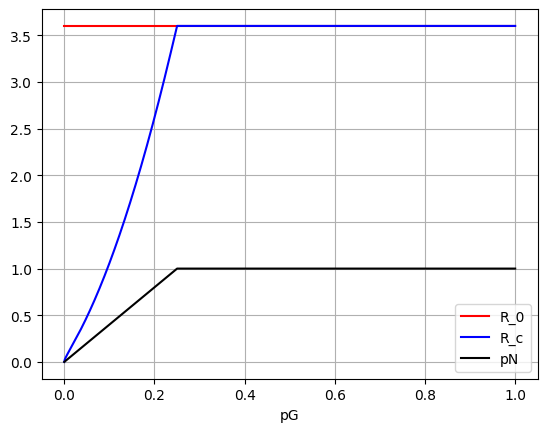

In [ ]:
# Parameters to be used.
# k is for <k>, 1 is for N and 2 is for P as in b11 = beta_NN, and z is for zeta
k = 4.5
mu = 0.2
b11 = 0.16
b12 = 0.1 * b11
b21 = 0.2 * b11
b22 = 0.0
pG = 0.4
z1 = 0.8
z2 = 0.0
z3 = 0.2
z4 = 0.4

def rho_N(pG, z1, z3, z4): # defines the function of rho*_N according to A.2
    if z4 - z3 > z1*pG and z1*pG >= 0: # condition used to pick which is the stable stationary solution
      pN = z1*pG/(z4 - z3)
    else:
      pN = 1
    return pN

def R(pG, z1, z3, z4): # defines the function of R_c used in the appendix
    if z4 - z3 > z1*pG and z1*pG >= 0: # this is the same as the definition above
      pN = z1*pG/(z4 - z3)
    else:
      pN = 1
    pP = 1 - pN

    g11 = pN * ( b11*(mu + z1*pG +z3*pN) + b21*z4*pP )
    g12 = pN * ( b11*(z1*pG +z3*pN) + b21*(mu + z4*pP) )
    g21 = pP * ( b12*(mu + z1*pG + z3*pN) + b22*z4*pP )
    g22 = pP * ( b12*(z1*pG + z3*pN) + b22*(mu + z4*pP) )

    detV = mu*(mu + z4 + z1*pG + (z3-z4)*pN)
    detG = g11*g22 - g12*g21
    trG = g11 + g22

    Rc = (k/detV)*(trG + (trG**2 - 4*detG)**0.5 )/2

    return Rc

def R0(pG, z1, z3, z4): # defines the function of R_0 used in the appendix
    return b11*k/mu

def plot_R(x_var, x_values, pG=None, z1=None, z3=None, z4=None):
    if x_var == 'pG':
        y_values = [R(x, z1, z3, z4) for x in x_values]
        pN_values = [rho_N(x, z1, z3, z4) for x in x_values]
        R0_values = [R0(x, z1, z3, z4) for x in x_values]
    elif x_var == 'z1':
        y_values = [R(pG, x, z3, z4) for x in x_values]
        pN_values = [rho_N(pG, x, z3, z4) for x in x_values]
        R0_values = [R0(pG, x, z3, z4) for x in x_values]
    elif x_var == 'z3':
        y_values = [R(pG, z1, x, z4) for x in x_values]
        pN_values = [rho_N(pG, z1, x, z4) for x in x_values]
        R0_values = [R0(pG, z1, x, z4) for x in x_values]
    elif x_var == 'z4':
        y_values = [R(pG, z1, z3, x) for x in x_values]
        pN_values = [rho_N(pG, z1, z3, x) for x in x_values]
        R0_values = [R0(pG, z1, z3, x) for x in x_values]
    else:
        raise ValueError("Invalid variable name for X-axis.")

    plt.plot(x_values, R0_values, color='red', label='R_0')
    plt.plot(x_values, y_values, color='blue', label='R_c')
    plt.plot(x_values, pN_values, color='black', label='pN')
    plt.xlabel(x_var)
    plt.legend()
    plt.grid(True)
    plt.savefig(f'pG_z1={z1}_z3={z3}_z4={z4}.png')
    plt.show()

x_values = np.linspace(0, 1, 1000)

x_axis_variable = 'pG' # picks the variable to be used in the x axis
plot_R(x_axis_variable, x_values, pG, z1, z3, z4)

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
def plot_R_2(x_var, x_values, pG=None, z1=None, z3=None, z4=None, ax=None):
    if x_var == 'pG':
        y_values = [R(x, z1, z3, z4) for x in x_values]
        pN_values = [rho_N(x, z1, z3, z4) for x in x_values]
        R0_values = [R0(x, z1, z3, z4) for x in x_values]
        ax.set_xlabel(r'$\rho_G$', fontsize=16)
    elif x_var == 'z1':
        y_values = [R(pG, x, z3, z4) for x in x_values]
        pN_values = [rho_N(pG, x, z3, z4) for x in x_values]
        R0_values = [R0(pG, x, z3, z4) for x in x_values]
        ax.set_xlabel(r'$\zeta_1$', fontsize=16)
    elif x_var == 'z3':
        y_values = [R(pG, z1, x, z4) for x in x_values]
        pN_values = [rho_N(pG, z1, x, z4) for x in x_values]
        R0_values = [R0(pG, z1, x, z4) for x in x_values]
        ax.set_xlabel(r'$\zeta_3$', fontsize=16)
    elif x_var == 'z4':
        y_values = [R(pG, z1, z3, x) for x in x_values]
        pN_values = [rho_N(pG, z1, z3, x) for x in x_values]
        R0_values = [R0(pG, z1, z3, x) for x in x_values]
        ax.set_xlabel(r'$\zeta_4$', fontsize=16)
    else:
        raise ValueError("Invalid variable name for X-axis.")

    ax.plot(x_values, R0_values, color='red', label='$R_0$')
    ax.plot(x_values, y_values, linestyle='--', color='blue', label='$R_c$')
    ax.plot(x_values, pN_values, color='black', label=r'$\rho_N$')
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.legend(fontsize=14, loc='center right')
    ax.yaxis.set_major_locator(MultipleLocator(0.5))
    ax.set_ylim(0.0, 3.75)
    ax.grid(True)

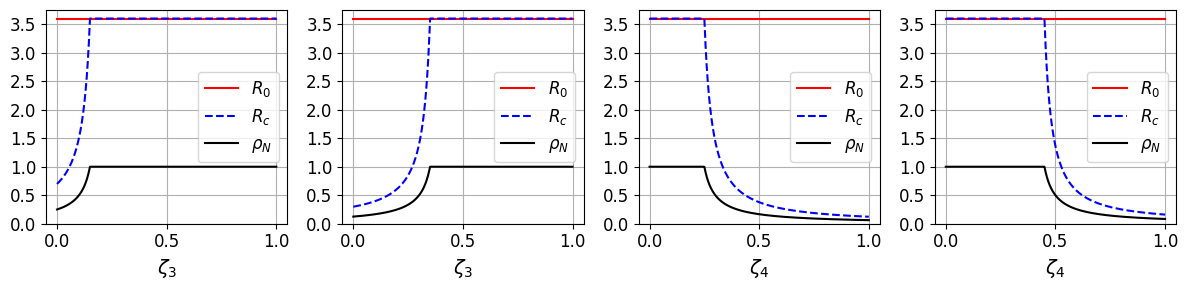

In [ ]:
# Creating the plot
x_values = np.linspace(0, 1, 1000)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 3))

# Panel A
pG = 0.1
z1 = 0.5
z4 = 0.2 #0.4
z3_values = x_values
plot_R_2('z3', z3_values, pG=pG, z1=z1, z4=z4, ax=ax1)

# Panel B
pG = 0.1
z1 = 0.5
z4 = 0.4 #0.4
z3_values = x_values
plot_R_2('z3', z3_values, pG=pG, z1=z1, z4=z4, ax=ax2)

# Panel C
pG = 0.1
z1 = 0.5
z3 = 0.2 #0.2
z4_values = x_values
plot_R_2('z4', z4_values, pG=pG, z1=z1, z3=z3, ax=ax3)

# Panel D
pG = 0.1
z1 = 0.5
z3 = 0.4 #0.2
z4_values = x_values
plot_R_2('z4', z4_values, pG=pG, z1=z1, z3=z3, ax=ax4)

plt.tight_layout()
plt.savefig('/content/drive/My Drive/Information_Behavior_Disease_Networks/Rc_plots/four_panels_z3_z4.pdf')
plt.show()


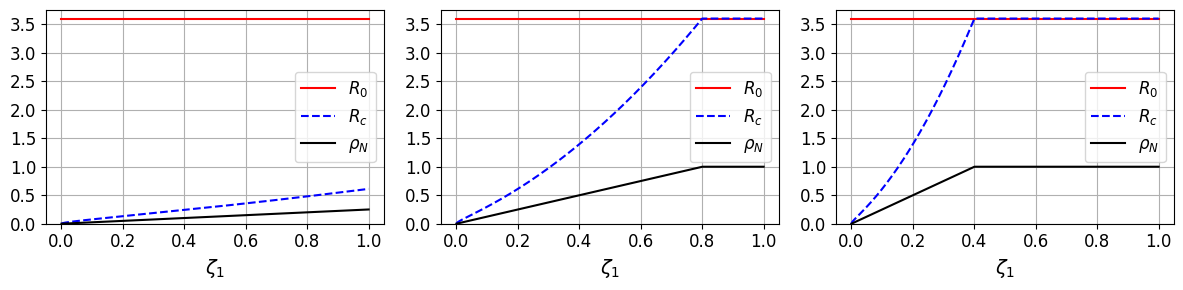

In [ ]:
# Creating the plot
x_values = np.linspace(0, 1, 1000)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))

# Panel A
pG = 0.05
z3 = 0.2
z4 = 0.4
z1_values = x_values
plot_R_2('z1', z1_values, pG=pG, z3=z3, z4=z4, ax=ax1)

# Panel B
pG = 0.25
z3 = 0.2
z4 = 0.4
z1_values = x_values
plot_R_2('z1', z1_values, pG=pG, z3=z3, z4=z4, ax=ax2)

# Panel C
pG = 0.5
z3 = 0.2
z4 = 0.4
z1_values = x_values
plot_R_2('z1', z1_values, pG=pG, z3=z3, z4=z4, ax=ax3)

plt.tight_layout()
plt.savefig('/content/drive/My Drive/Information_Behavior_Disease_Networks/Rc_plots/three_panels_z1.pdf')
plt.show()

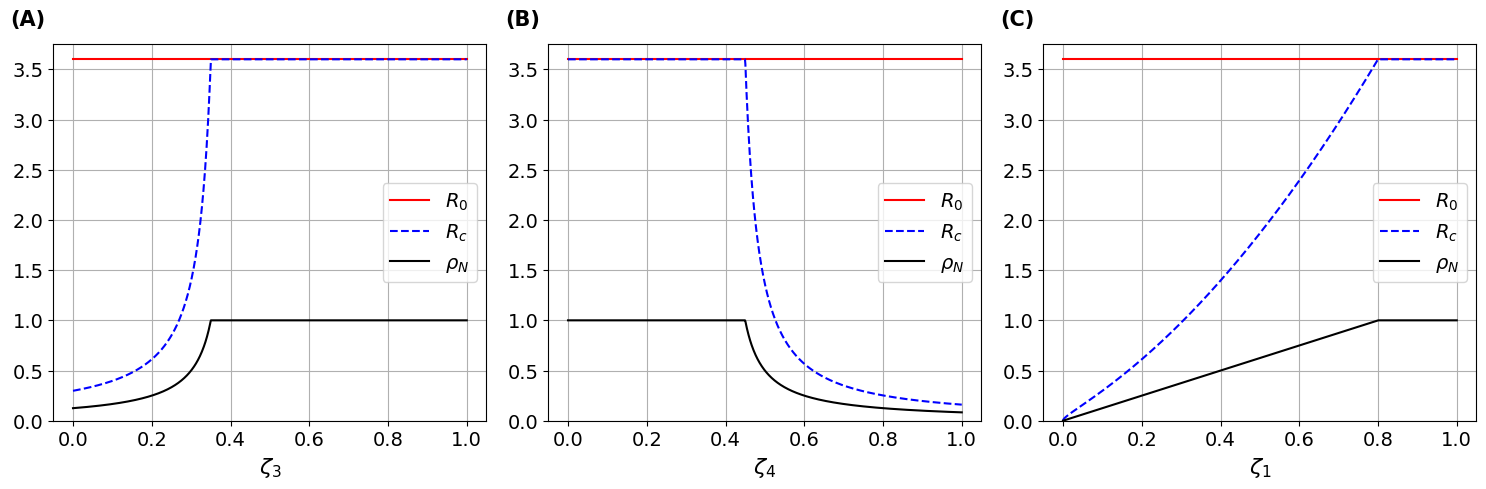

In [ ]:
# Creating the plot
x_values = np.linspace(0, 1, 1000)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Panel B from the first figure
pG = 0.1
z1 = 0.5
z4 = 0.4
z3_values = x_values
plot_R_2('z3', z3_values, pG=pG, z1=z1, z4=z4, ax=ax1)

# Panel D from the first figure
pG = 0.1
z1 = 0.5
z3 = 0.4
z4_values = x_values
plot_R_2('z4', z4_values, pG=pG, z1=z1, z3=z3, ax=ax2)

# Panel B from the second figure
pG = 0.25
z3 = 0.2
z4 = 0.4
z1_values = x_values
plot_R_2('z1', z1_values, pG=pG, z3=z3, z4=z4, ax=ax3)

# Adding labels (A), (B), (C) to each panel
ax1.text(-0.1, 1.05, '(A)', transform=ax1.transAxes, size=15, weight='bold')
ax2.text(-0.1, 1.05, '(B)', transform=ax2.transAxes, size=15, weight='bold')
ax3.text(-0.1, 1.05, '(C)', transform=ax3.transAxes, size=15, weight='bold')

plt.tight_layout()
plt.savefig('/content/drive/My Drive/Information_Behavior_Disease_Networks/Rc_plots/combined_3_panel_plot.pdf')
plt.show()

# Heatmap plot

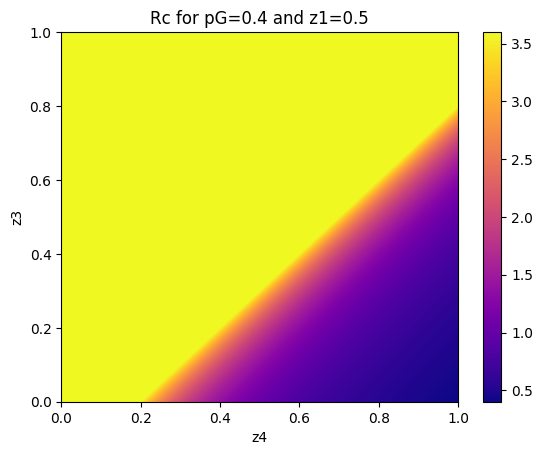

In [ ]:
# Parameters to be used.
# k is for <k>, 1 is for N and 2 is for P as in b11 = beta_NN, and z is for zetak = 4.5
mu = 0.2
b11 = 0.16
b12 = 0.1 * b11
b21 = 0.2 * b11
b22 = 0.0
pG = 0.4
z1 = 0.5
z2 = 0.0
z3 = 0.2
z4 = 0.4

def R(pG, z1, z3, z4): # defines the function of R_c according to the appendix
    if z4 - z3 > z1 * pG and z1 * pG >= 0:
        pN = z1 * pG / (z4 - z3)
    else:
        pN = 1
    pP = 1 - pN

    g11 = pN * ( b11*(mu + z1*pG +z3*pN) + b21*z4*pP )
    g12 = pN * ( b11*(z1*pG +z3*pN) + b21*(mu + z4*pP) )
    g21 = pP * ( b12*(mu + z1*pG + z3*pN) + b22*z4*pP )
    g22 = pP * ( b12*(z1*pG + z3*pN) + b22*(mu + z4*pP) )

    detV = mu*(mu + z4 + z1*pG + (z3-z4)*pN)
    detG = g11*g22 - g12*g21
    trG = g11 + g22

    Rc = (k/detV)*(trG + (trG**2 - 4*detG)**0.5 )/2

    return Rc

x_values = np.linspace(0, 1, 1000)
y_values = np.linspace(0, 1, 1000)

heatmap = np.zeros((len(x_values), len(y_values)))

for j, z4 in enumerate(x_values): # change z4 to any other variable to plot in the x axis
    for i, z3 in enumerate(y_values): # change z1 to any other variable to plot in the y axis
        result = R(pG, z1, z3, z4)
        heatmap[i, j] = result

plt.title(f'Rc for pG={pG} and z1={z1}') # remember to change the title
plt.imshow(heatmap, extent=(min(y_values), max(y_values), min(x_values), max(x_values)), origin='lower', aspect='auto', cmap='plasma')
plt.colorbar()
plt.xlabel('z4') # remember to change the x axis name
plt.ylabel('z3') # remember to change the y axis name
plt.savefig(f'heat_z4-z3_pG={pG}_z1={z1}.png') # remember to change the filename
plt.show()

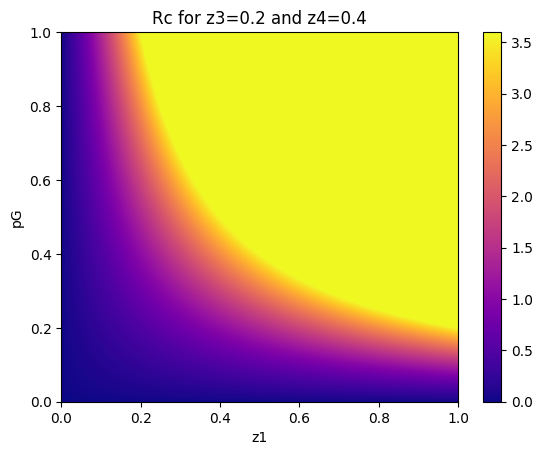

In [ ]:
mu = 0.2
b11 = 0.16
b12 = 0.1 * b11
b21 = 0.2 * b11
b22 = 0.0
pG = 0.4
z1 = 0.5
z2 = 0.0
z3 = 0.2
z4 = 0.4

x_values = np.linspace(0, 1, 1000)
y_values = np.linspace(0, 1, 1000)

heatmap = np.zeros((len(x_values), len(y_values)))

for j, z1 in enumerate(x_values): # change z4 to any other variable to plot in the x axis
    for i, pG in enumerate(y_values): # change z1 to any other variable to plot in the y axis
        result = R(pG, z1, z3, z4)
        heatmap[i, j] = result

plt.title(f'Rc for z3={z3} and z4={z4}') # remember to change the title
plt.imshow(heatmap, extent=(min(y_values), max(y_values), min(x_values), max(x_values)), origin='lower', aspect='auto', cmap='plasma')
plt.colorbar()
plt.xlabel('z1') # remember to change the x axis name
plt.ylabel('pG') # remember to change the y axis name
#plt.savefig(f'heat_pG-z1_z3={z3}_z4={z4}.png') # remember to change the filename
plt.show()

In [ ]:
# Parameters to be used.
# k is for <k>, 1 is for N and 2 is for P as in b11 = beta_NN, and z is for zetak = 4.5
k = 4.5
mu = 0.2
b11 = 0.16
b12 = 0.1 * b11
b21 = 0.2 * b11
b22 = 0.0
pG = 0.4
z1 = 0.5
z2 = 0.0
z3 = 0.2
z4 = 0.4

def R(pG, z1, z3, z4): # defines the function of R_c according to the appendix
    if z4 - z3 > z1 * pG and z1 * pG >= 0:
        pN = z1 * pG / (z4 - z3)
    else:
        pN = 1
    pP = 1 - pN

    g11 = pN * ( b11*(mu + z1*pG +z3*pN) + b21*z4*pP )
    g12 = pN * ( b11*(z1*pG +z3*pN) + b21*(mu + z4*pP) )
    g21 = pP * ( b12*(mu + z1*pG + z3*pN) + b22*z4*pP )
    g22 = pP * ( b12*(z1*pG + z3*pN) + b22*(mu + z4*pP) )

    detV = mu*(mu + z4 + z1*pG + (z3-z4)*pN)
    detG = g11*g22 - g12*g21
    trG = g11 + g22

    Rc = (k/detV)*(trG + (trG**2 - 4*detG)**0.5 )/2

    return Rc

In [ ]:
def create_heatmap(x_label, y_label, pG, z1, z3, z4, show_colorbar=False):
    x_values = np.linspace(0, 1, 100)
    y_values = np.linspace(0, 1, 100)

    heatmap = np.zeros((len(x_values), len(y_values)))

    for j, x in enumerate(x_values):
        for i, y in enumerate(y_values):
            if x_label == '$\zeta_4$': #z4
                z4 = x
            if y_label == '$\zeta_4$': #z4
                z4 = y
            if x_label == '$\zeta_3$':  #z3
                z3 = x
            if y_label == '$\zeta_3$':  #z3
                z3 = y
            if x_label == r'$\rho_G$':  #pG
                pG = x
            if y_label == r'$\rho_G$':  #pG
                pG = y
            if x_label == '$\zeta_1$':  #z1
                z1 = x
            if y_label == '$\zeta_1$':  #z1
                z1 = y

            result = R(pG, z1, z3, z4)
            heatmap[i, j] = result

    plt.imshow(heatmap, extent=(min(x_values), max(x_values), min(y_values), max(y_values)),
               origin='lower', aspect='auto', cmap='plasma', vmin=0, vmax=3.5)

    if show_colorbar:
        plt.colorbar()

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    #plt.title(f'Rc for {x_label} and {y_label} with pG={pG}, z1={z1}')
    #plt.show()

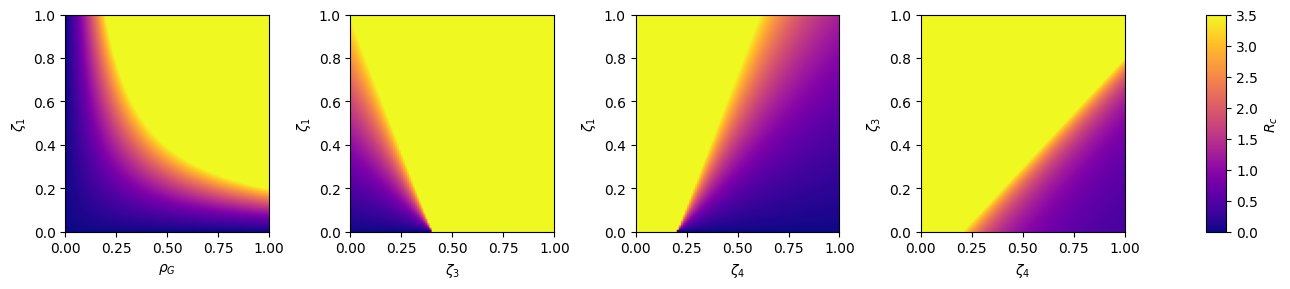

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create a figure and grid layout
fig = plt.figure(figsize=(13, 3))
gs = gridspec.GridSpec(1, 5, width_ratios=[1.2, 1.2, 1.2, 1.2, 0.12])

# Plot the 4 panel heatmap
ax1 = plt.subplot(gs[0])
create_heatmap(r'$\rho_G$', '$\zeta_1$', pG, z1, z3, z4)

ax2 = plt.subplot(gs[1])
create_heatmap('$\zeta_3$', '$\zeta_1$', pG, z1, z3, z4)

ax3 = plt.subplot(gs[2])
create_heatmap('$\zeta_4$', '$\zeta_1$', pG, z1, z3, z4)

ax4 = plt.subplot(gs[3])
create_heatmap('$\zeta_4$', '$\zeta_3$', pG, z1, z3, z4)

# Add colorbar to the last panel
ax5 = plt.subplot(gs[4])
cbar = plt.colorbar(ax4.images[0], cax=ax5)  # Use ax4's image object for colorbar
cbar.set_label('$R_c$')

plt.tight_layout()
plt.savefig('/content/drive/My Drive/Information_Behavior_Disease_Networks/Rc_plots/four_panels_heatmap.pdf')
plt.show()
